<a href="https://colab.research.google.com/github/luquelab/lab-data-science/blob/data-distribution/notebooks/analyze_multimodal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze multimodal data

## Description

## Quick-start guide

## Import libraries

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Input data and parameters

In [22]:
# Load data as CSV (adjust path as needed)
df = pd.read_csv('data_sample.csv')

## Rename first column to 'feature'
first_col = df.columns[0]
df = df.rename(columns={first_col: 'feature'})
print(f"Dataset shape: {df.shape}")


Dataset shape: (1000, 1)


# Code

## Prototype

In [ ]:
# Import libraries

# Load data

# Summarize the statistics of the data

# Visual exploration of data distribution

# Input multimode constraints

# Obtain modes

# Generate plot with distribution and histogram

# Save analysis

## Definitions

### Functions

#### Freedman-Diaconis rule
This rule uses the interquartile range (IQR) and is widely regarded as robust for various distributions, including normal ones. The formula for bin width is:

`h = 2 x IQR x n^(-1/3)`

Where
+ `h` is the bandwidth
+ `IQR` is the interquartile range of data
+ `n` is the number of observations

This method adjusts the bin width based on data spread and sample size, making it suitable for normal distributions. For more information see [Statistics How To](https://www.statisticshowto.com/choose-bin-sizes-statistics/)


In [90]:
def freedman_diaconis_rule(data):
  """
  Calculates the optimal bin size using the Freedman-Diaconis rule.

  Args:
    data: A 1D numpy array or pandas Series of numerical data.

  Returns:
    The optimal bin width.
    The optimal number of bins.
    The optimal number of bins rounded.
  """

  # Bin width
  iqr = np.percentile(data, 75) - np.percentile(data, 25)
  n = len(data)
  h = 2 * iqr / (n ** (1/3))

  # Number of bins
  range = data.max() - data.min()
  k = range / h
  kround = round(k)

  return h, k, kround

# Example usage (assuming 'feature' column in your DataFrame):
#h, k, kround = freedman_diaconis_rule(df['feature'])
#print("Friedman-Diaconis' rule")
#print(f"Optimal bin size: {h}")
#print(f"Optimal number of bins: {k}")
#print(f"Optimal number of bins (rounded): {kround}")

#### Rice rule
The Rice Rule provides a simple approximation for determining the number of bins (
k):

`k = 2 x n^(1/3)`

The bin width can then be calculated as:

`h = range/k`

Where `n` is the number of observations.

This method is less sensitive to outliers and works reasonably well for large datasets, but it may oversmooth smaller datasets. For more information see [Statistics How To](https://www.statisticshowto.com/choose-bin-sizes-statistics/)


In [86]:
def rice_rule(data):
  """
  Calculates the optimal bin size using the Rice rule.

  Args:
    data: A 1D numpy array or pandas Series of numerical data.

  Returns:
    The optimal bin width.
    The optimal number of bins.
    The optimal number of bins rounded.
  """
  # Optimal number of bins
  n = len(data)
  k = 2 * (n ** (1/3))

  # Bin width
  range = data.max() - data.min()
  h = range / k

  return h, k, round(k)

# Example usage (assuming 'feature' column in your DataFrame):
#h, k, kround = rice_rule(df['feature'])
#print("Rice's rule")
#print(f"Optimal bin size: {h}")
#print(f"Optimal number of bins: {k}")
#print(f"Optimal number of bins (rounded): {kround}")

#### Sturges’ rule
Sturges’ Rule calculates the number of bins based on logarithmic scaling:

`k = 1 + log2(n)`

Where `k` is the number of bins and `n` is the number of observations. While simple, this rule often oversmooths histograms for large datasets, making it less suitable for precise analysis. For more information see [Statistics How To](https://www.statisticshowto.com/choose-bin-sizes-statistics/)

In [85]:
def sturges_rule(data):
  """
  Calculate the optimal number of bins using Sturge's rule.

  Args:
    data: A 1D numpy array or pandas Series of numerical data.

  Returns:
    The optimal number of bins.
  """

  # Number of bins
  n = len(data)
  k = 1 + np.log2(n)
  kround = round(k)

  # Bin size
  range = data.max() - data.min()
  h = range / k
  h = round(h)

  return h, k, kround

# Example usage (assuming 'feature' column in your DataFrame):
#h, k, kround = sturges_rule(df['feature'])
#print("Sturge's rule")
#print(f"Optimal bin size: {h}")
#print(f"Optimal number of bins: {k}")
#print(f"Optimal number of bins (rounded): {kround}")

## Descriptive statistics

Generate summary statistics and supplement with skewness and kurtosis.

For categorical variables, use `.value_counts(normalize=True)`

Typical values to interpret [skewness](https://en.wikipedia.org/wiki/Skewness):
+ `0`: Zero skewness: Symmetrical distribution
+ `>0`: Positive skewness (right-skewed): The tail on the right side is longer or fatter.
+ `<0`: Negative skewness (left-skewed): The tail on the left side is longer or fatter.
+ `0`: Normal distribution
+ `1`: Half-normal distribution
+ `2`: Exponential distribution
+ `>0`: Lognormal distribution

Typical values to interpret the [Kurtosis](https://en.wikipedia.org/wiki/Kurtosis):
+ `~3`: Mesokurtic: A normal distribution with moderate tails.
+ `>3`: Leptokurtic: A distribution with heavy tails.
+ `<3`: Platykurtic: A distribution with light tails.

In [38]:
# Summary stats
stats_summary = df.describe(include='all').T
stats_summary['range'] = df.max() - df.min()
stats_summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)
stats_summary['skewness'] = df.skew()
stats_summary['kurtosis'] = df.kurtosis()


In [39]:
# Export the summary
# stats_summary.to_csv('statistical_summary.csv')
stats_summary.T.to_csv('statistical_summary.csv')

## Qualitative multimodality assessment

### Standard binnings

In [101]:
# Calculate and store bin widths and number of bins for each rule
bin_stats = pd.DataFrame(columns=['Rule', 'Bin Width', 'Number of Bins'])

h, k, kround = freedman_diaconis_rule(df['feature'])
bin_stats = pd.concat([bin_stats, pd.DataFrame([{'Rule': 'Freedman-Diaconis', 'Bin Width': h, 'Number of Bins': kround}])], ignore_index=True)

h, k, kround = rice_rule(df['feature'])
bin_stats = pd.concat([bin_stats, pd.DataFrame([{'Rule': 'Rice', 'Bin Width': h, 'Number of Bins': kround}])], ignore_index=True)

h, k, kround = sturges_rule(df['feature'])
bin_stats = pd.concat([bin_stats, pd.DataFrame([{'Rule': 'Sturges', 'Bin Width': h, 'Number of Bins': kround}])], ignore_index=True)

# Display bin statistics
bin_stats


<ipython-input-101-e3d3eb7c0b79>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bin_stats = pd.concat([bin_stats, pd.DataFrame([{'Rule': 'Freedman-Diaconis', 'Bin Width': h, 'Number of Bins': kround}])], ignore_index=True)


,Rule,Bin Width,Number of Bins
0,Freedman-Diaconis,1.805267,23
1,Rice,2.042471,20
2,Sturges,4.000000,11


In [102]:
# Save bin statistics
bin_stats.to_csv('bin_statistics.csv', index=False)

#### Plots

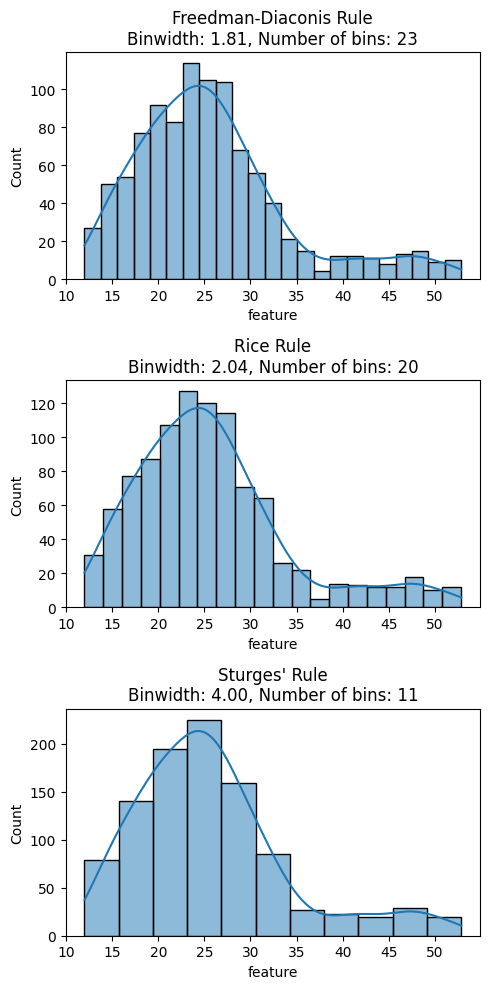

In [107]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))

# Freedman-Diaconis
rule = 'Freedman-Diaconis'
rule_stats = bin_stats[bin_stats['Rule'] == rule]
h = rule_stats['Bin Width'].iloc[0]
kround = rule_stats['Number of Bins'].iloc[0]
sns.histplot(df['feature'], kde=True, bins=kround, ax=axes[0])
axes[0].set_title(f'Freedman-Diaconis Rule\nBinwidth: {h:.2f}, Number of bins: {kround}')

# Rice Rule
rule = 'Rice'
rule_stats = bin_stats[bin_stats['Rule'] == rule]
h = rule_stats['Bin Width'].iloc[0]
kround = rule_stats['Number of Bins'].iloc[0]
sns.histplot(df['feature'], kde=True, bins=kround, ax=axes[1])
axes[1].set_title(f'Rice Rule\nBinwidth: {h:.2f}, Number of bins: {kround}')

# Sturges' Rule
rule = 'Sturges'
rule_stats = bin_stats[bin_stats['Rule'] == rule]
h = rule_stats['Bin Width'].iloc[0]
kround = rule_stats['Number of Bins'].iloc[0]
sns.histplot(df['feature'], kde=True, bins=kround, ax=axes[2])
axes[2].set_title(f"Sturges' Rule\nBinwidth: {h:.2f}, Number of bins: {kround}")

plt.tight_layout()

plt.savefig('distribution_binnig_rules.png')
plt.savefig('distribution_binnig_rules.pdf')

plt.show()


### Manual binning
Input number of bins for manual exploration. The code cell will generate the plot.

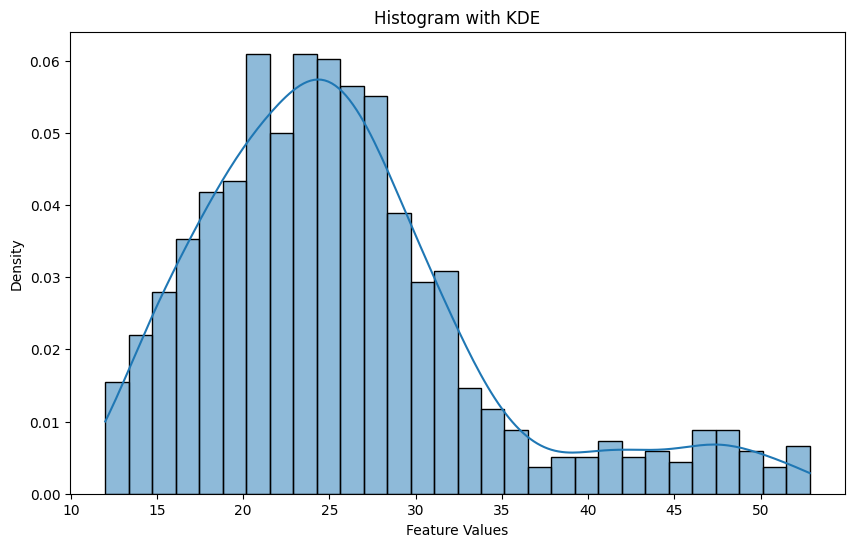

In [111]:
# Number of bins
bins = 30

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['feature'], bins=bins, kde=True, stat='density')
plt.title('Histogram with KDE')
plt.xlabel('Feature Values')
plt.ylabel('Density')


plt.savefig('distribution_binnig_manual.png')
plt.savefig('distribution_binnig_manual.pdf')

plt.show()


## Identify modes

# Outputs

## Download files